In [51]:
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from os import getcwd
%matplotlib inline
from matplotlib import style
from pandas import DataFrame,merge
style.use("ggplot")
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression

In [3]:
animals = pd.read_csv(getcwd() + "\\Shelter Animal Outcomes.csv", 
                    index_col='AnimalID')

In [18]:
animals.head(100)

,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Sex,Neutered
AnimalID,,,,,,,,,,,
A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,Male,Neutered
A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,Female,Neutered
A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,Male,Neutered
A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,Male,Intact
A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,Male,Neutered
A677334,Elsa,2014-04-25 13:04:00,Transfer,Partner,Dog,Intact Female,1 month,Cairn Terrier/Chihuahua Shorthair,Black/Tan,Female,Intact
A699218,Jimmy,2015-03-28 13:11:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Tabby,Male,Intact
A701489,NaN,2015-04-30 17:02:00,Transfer,Partner,Cat,Unknown,3 weeks,Domestic Shorthair Mix,Brown Tabby,Unknown,Unknown
A671784,Lucy,2014-02-04 17:17:00,Adoption,NaN,Dog,Spayed Female,5 months,American Pit Bull Terrier Mix,Red/White,Female,Neutered


In [5]:
animals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26729 entries, A671945 to A706629
Data columns (total 9 columns):
Name              19038 non-null object
DateTime          26729 non-null object
OutcomeType       26729 non-null object
OutcomeSubtype    13117 non-null object
AnimalType        26729 non-null object
SexuponOutcome    26728 non-null object
AgeuponOutcome    26711 non-null object
Breed             26729 non-null object
Color             26729 non-null object
dtypes: object(9)
memory usage: 2.0+ MB


## First, let's count how many cats and dogs we have in the shelter.

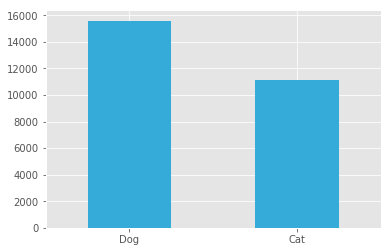

In [6]:
AnimalType = animals['AnimalType'].value_counts() 
AnimalType.plot(kind='bar',color='#34ABD8',rot=0)

## Now, let's see how different outcomes are distributed.

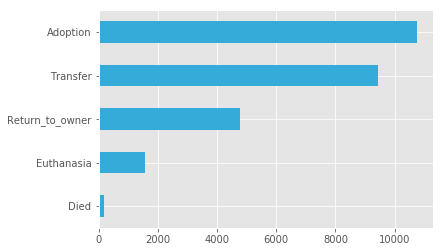

In [7]:
AnimalType = animals.OutcomeType.value_counts().sort_values() 
AnimalType.plot(kind='barh',color='#34ABD8',rot=0)

## And now,we will see the OutcomType between dogs and cats

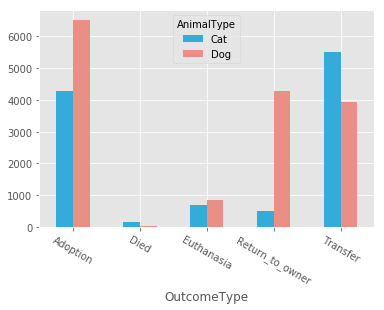

In [8]:
AnimalType = animals[['AnimalType','OutcomeType']].groupby(['OutcomeType','AnimalType']).size().unstack()
AnimalType.plot(kind='bar',color=['#34ABD8','#E98F85'],rot=-30)

In [9]:
# We can see that adoption and transfer are our leaders (good for poor animals).

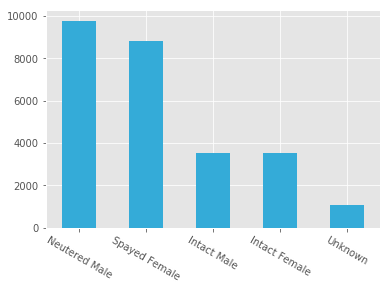

In [10]:
# We have another column - sex upon outcome.
SexuponOutcome = animals['SexuponOutcome'].value_counts()
SexuponOutcome.plot(kind='bar',color=['#34ABD8'],rot=-30)

In [11]:
# We can find out all types of sex in SexuponOutcome,and we will calssify them:
sexType = animals['SexuponOutcome'].unique()
print(sexType)

['Neutered Male' 'Spayed Female' 'Intact Male' 'Intact Female' 'Unknown'
 nan]


In [12]:
# Now we create the dict and add the data to DataFrame-animals:
M_F = {'Neutered Male':'Male','Spayed Female':'Female','Intact Male':'Male','Intact Female':'Female','Unknown':'Unknown'}
N_T = {'Neutered Male':'Neutered','Spayed Female':'Neutered','Intact Male':'Intact','Intact Female':'Intact','Unknown':'Unknown'}

animals['Sex'] = animals.SexuponOutcome.map(M_F)
animals['Neutered'] = animals.SexuponOutcome.map(N_T)

[Text(0,0,'Neutered'), Text(0,0,'Intact'), Text(0,0,'Unknown')]

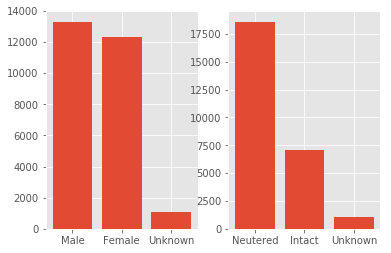

In [13]:
Sex = DataFrame(animals.Sex.value_counts())
Neutered = DataFrame(animals.Neutered.value_counts())
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.bar([1,2,3],Sex['Sex'],align='center')
ax1.set_xticks([1,2,3])
ax1.set_xticklabels(Sex.index)
ax2.bar([1,2,3],Neutered['Neutered'],align='center')
ax2.set_xticks([1,2,3])
ax2.set_xticklabels(Neutered.index)

it seems like we have approximately equal number of male and female animals, and neutered (or spayed) prevail amongst them.

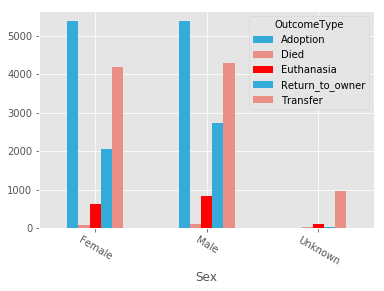

In [14]:
df = DataFrame(animals[['Sex','OutcomeType']])
#df.plot(kind='bar')
OutcomeSex = df.groupby(['Sex','OutcomeType']).size().unstack()
OutcomeSex.plot(kind='bar',color=['#34ABD8','#E98F85','r'],rot=-30)

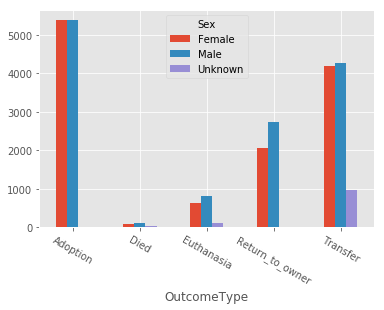

In [15]:
df = DataFrame(animals[['Sex','OutcomeType']])
SexOutcome = df.groupby(['OutcomeType','Sex']).size().unstack()
SexOutcome.plot(kind='bar',rot=-30)

Now we'll see if the neutered could influence the OutcomeType

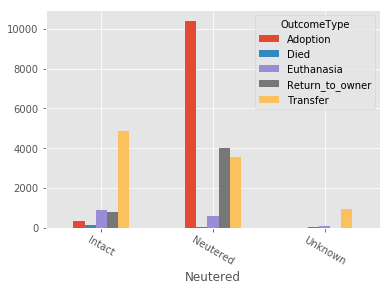

In [16]:
OT_N = animals[['OutcomeType','Neutered']].groupby(['Neutered','OutcomeType']).size().unstack()
OT_N.plot(kind='bar',rot=-30)

As you see:The Neutered pets are accepted mostly.The points should be on the Neutereds!

<Container object of 7 artists>

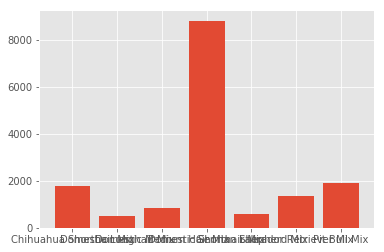

In [28]:
# We have another column - Bread.
Breed = animals['Breed'].value_counts()
# Breed.plot(kind='bar',color=['#34ABD8'],rot=-30)

top_breed = pd.DataFrame(Breed.reset_index())
top_breed.columns = ['Breed', 'count']

top_breed = top_breed[top_breed['count'] > 500]

plt.bar(top_breed['Breed'], top_breed['count'])


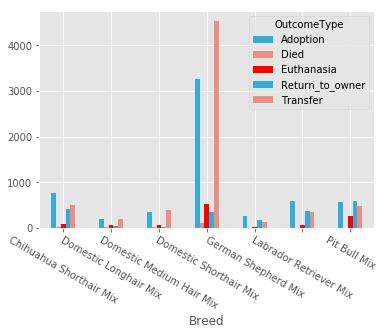

In [33]:
top_bread_names = set(top_breed['Breed'])
      
top_animals = animals[animals['Breed'].isin(top_bread_names)]    

df = DataFrame(top_animals[['Breed','OutcomeType']])
#df.plot(kind='bar')
Breed = df.groupby(['Breed','OutcomeType']).size().unstack()
Breed.plot(kind='bar',color=['#34ABD8','#E98F85','r'],rot=-30)

## LogisticRegresssion

In [91]:
animals1 = pd.get_dummies(animals, columns=['Sex', 'Neutered', 'Breed', 'AgeCategory'])
animals1.head()

,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Color,AgeInYears,Sex_Female,...,Breed_Yorkshire Terrier/Miniature Schnauzer,Breed_Yorkshire Terrier/Norfolk Terrier,Breed_Yorkshire Terrier/Parson Russell Terrier,Breed_Yorkshire Terrier/Pomeranian,Breed_Yorkshire Terrier/Rat Terrier,Breed_Yorkshire Terrier/Toy Poodle,AgeCategory_adult,AgeCategory_old,AgeCategory_young,AgeCategory_young adult
AnimalID,,,,,,,,,,,,,,,,,,,,,
A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Brown/White,1.000000,0,...,0,0,0,0,0,0,0,0,1,0
A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Cream Tabby,1.000000,1,...,0,0,0,0,0,0,0,0,1,0
A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Blue/White,2.000000,0,...,0,0,0,0,0,0,0,0,1,0
A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Blue Cream,0.057692,0,...,0,0,0,0,0,0,0,0,1,0
A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Tan,2.000000,0,...,0,0,0,0,0,0,0,0,1,0


In [86]:
def calc_age_in_years(x):
    x = str(x)
    if x == 'nan': return 0
    age = int(x.split()[0])
    if x.find('year') > -1: return age 
    if x.find('month')> -1: return age / 12.
    if x.find('week')> -1: return age / 52.
    if x.find('day')> -1: return age / 365.
    else: return 0

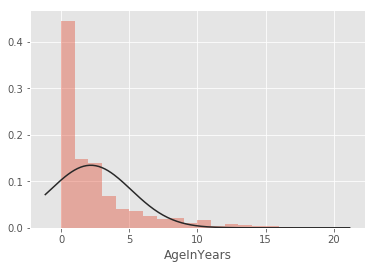

In [88]:
from scipy.stats import norm
animals['AgeInYears'] = animals.AgeuponOutcome.apply(calc_age_in_years)
sns.distplot(animals.AgeInYears, fit=norm, bins = 20, kde=False)

In [89]:
def calc_age_category(x):
    if x < 3: return 'young'
    if x < 5: return 'young adult'
    if x < 10: return 'adult'
    return 'old'
animals['AgeCategory'] = animals.AgeInYears.apply(calc_age_category)

In [92]:

animals1_clf = LogisticRegression()

X = animals1.drop(['Name','DateTime','OutcomeType','OutcomeSubtype','SexuponOutcome','AgeuponOutcome', 'Color','AnimalType'], axis=1)
X['bias'] = np.ones(len(X), dtype=int)

y = animals1['OutcomeType']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=451816)

animals1_clf.fit(X_train, y_train)




C:\Users\gavrielb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [93]:
y_pred = animals1_clf.predict(X_test)
y_pred

array(['Transfer', 'Adoption', 'Adoption', ..., 'Adoption',
       'Return_to_owner', 'Return_to_owner'], dtype=object)

In [94]:
print(classification_report(y_true=y_test,
                            y_pred=y_pred))

                 precision    recall  f1-score   support

       Adoption       0.63      0.87      0.73      3296
           Died       0.00      0.00      0.00        64
     Euthanasia       0.67      0.04      0.07       466
Return_to_owner       0.44      0.32      0.37      1421
       Transfer       0.72      0.62      0.67      2772

    avg / total       0.62      0.63      0.60      8019



C:\Users\gavrielb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
